In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()  # устанавливаем seaborn по умолчанию для отрисовки графиков

----

<b>1. Загрузите данных в dataframe</b>

In [4]:

mall_data = pd.read_csv("Mall_Customers.csv")

# Просмотр первых строк
print(mall_data.head())


   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40




 <b>2. Выводим статистическую информацию о наборе данных</b>

In [5]:
# Статистическая информация
print(mall_data.describe())

# Статистика по нечисловым данным
print(mall_data.describe(include=['O']))

       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000
         Genre
count      200
unique       2
top     Female
freq       112


<b> 3.Выводим название строк и столбцов</b>

In [6]:
# Названия столбцов
print("Столбцы:", mall_data.columns)

# Вывести индексы строк
print("Индексы строк:", mall_data.index)

Столбцы: Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')
Индексы строк: RangeIndex(start=0, stop=200, step=1)


**4. Заменяем категориальные данные количественными:**




In [8]:
# Замена категориальных данных
mall_data['Genre'] = mall_data['Genre'].map({'Male': 0, 'Female': 1})

# Проверим изменения
print(mall_data.head())


   CustomerID  Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1      0   19                  15                      39
1           2      0   21                  15                      81
2           3      1   20                  16                       6
3           4      1   23                  16                      77
4           5      1   31                  17                      40


<b> 5. Визуализация данных с помощью Matplotlib и Seaborn</b>

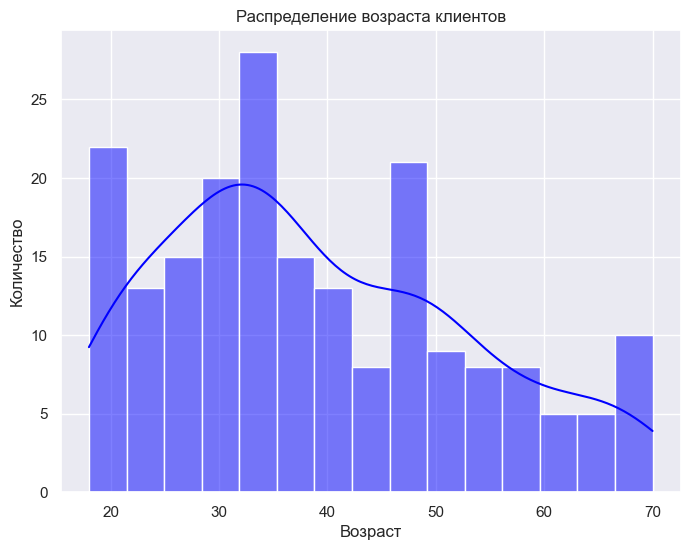

In [9]:
# Визуализация распределения возраста клиентов
plt.figure(figsize=(8, 6))
sns.histplot(mall_data['Age'], bins=15, kde=True, color='blue')
plt.title('Распределение возраста клиентов')
plt.xlabel('Возраст')
plt.ylabel('Количество')
plt.show()


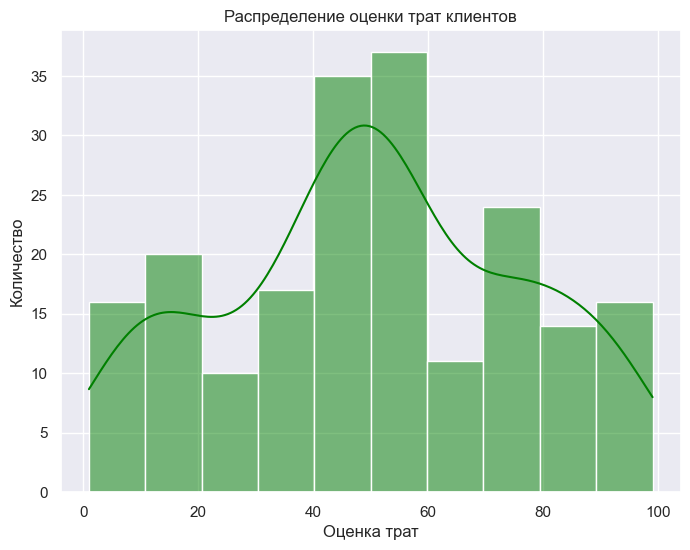

In [10]:
# Распределение оценки трат клиентов
plt.figure(figsize=(8, 6))
sns.histplot(mall_data['Spending Score (1-100)'], bins=10, kde=True, color='green')
plt.title('Распределение оценки трат клиентов')
plt.xlabel('Оценка трат')
plt.ylabel('Количество')
plt.show()

**Групповые визуализации**

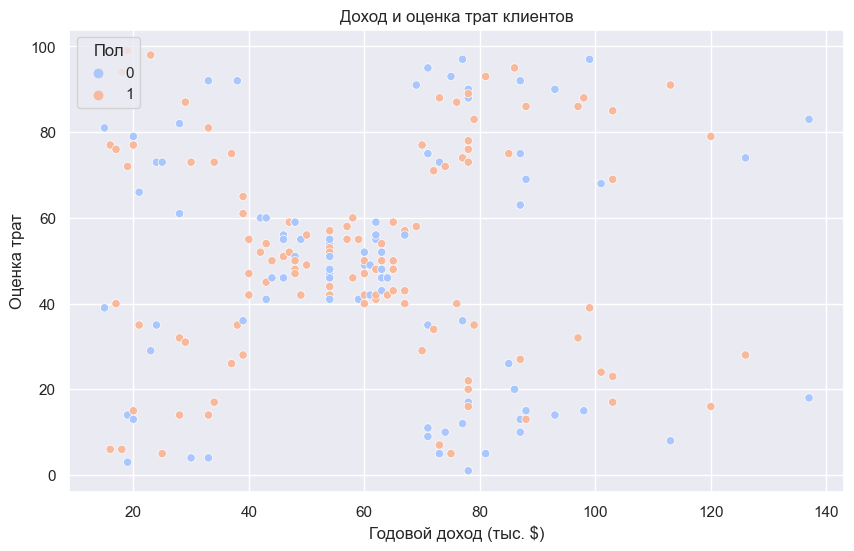

In [12]:
# Взаимосвязь дохода и оценок трат
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Genre', data=mall_data, palette='coolwarm')
plt.title('Доход и оценка трат клиентов')
plt.xlabel('Годовой доход (тыс. $)')
plt.ylabel('Оценка трат')
plt.legend(title='Пол', loc='upper left')
plt.show()


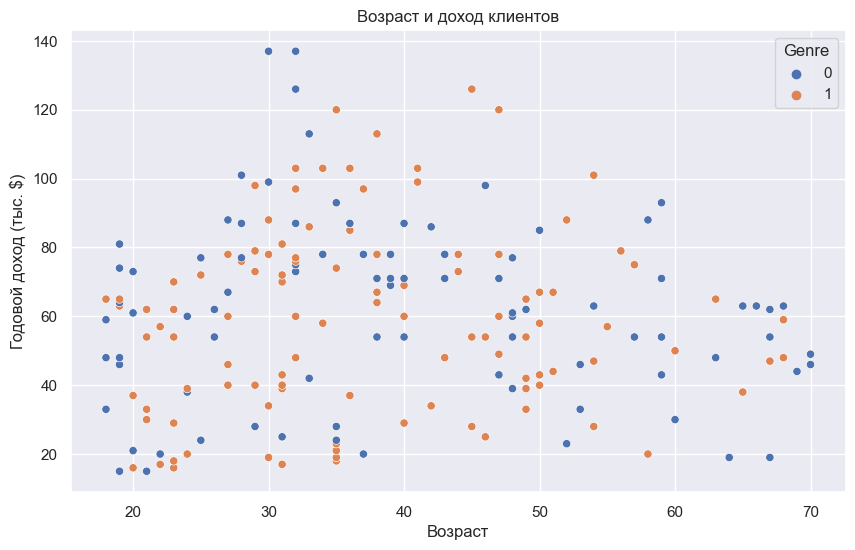

In [14]:
# Визуализация зависимости дохода и возраста
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Annual Income (k$)', hue='Genre', data=mall_data, palette='deep')
plt.title('Возраст и доход клиентов')
plt.xlabel('Возраст')
plt.ylabel('Годовой доход (тыс. $)')
plt.show()

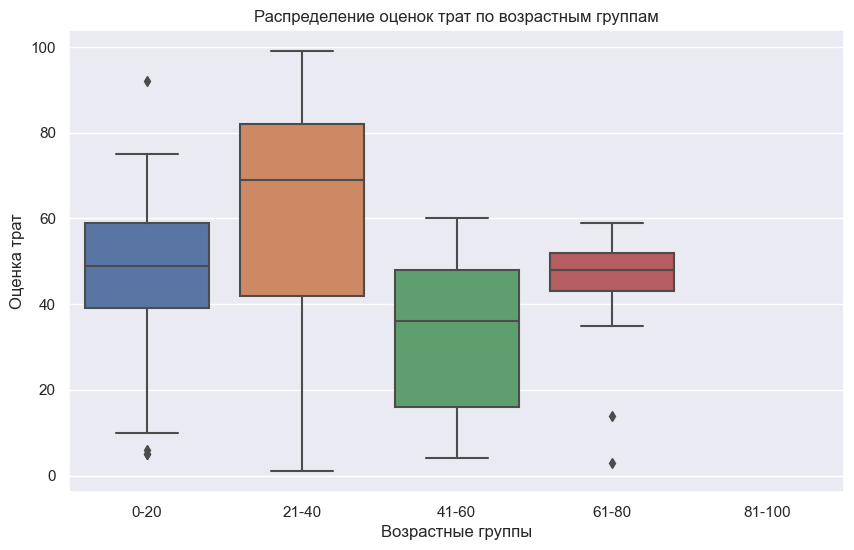

In [16]:
# Распределение оценки трат по возрастным группам
# Создание более широких возрастных групп
mall_data['Age_group'] = pd.cut(mall_data['Age'], 
                                bins=[0, 20, 40, 60, 80, 100], 
                                labels=['0-20', '21-40', '41-60', '61-80', '81-100'])
plt.figure(figsize=(10, 6))
sns.boxplot(x='Age_group', y='Spending Score (1-100)', data=mall_data)
plt.title('Распределение оценок трат по возрастным группам')
plt.xlabel('Возрастные группы')
plt.ylabel('Оценка трат')
plt.show()